In [13]:
from matplotlib import pyplot as plt
from GGH import GGH
import numpy as np
import pandas as pd
from tqdm import tqdm

import scienceplots

plt.style.use('science')

In [14]:
def GGH_sample(m, n, sigma, print_result = False):

    m_recovered = np.array([0, 0, 0])
    attempts = 0
    
    while (m == m_recovered).all() == False:

        attempts += 1

        if print_result:
            print('------------------ \nGGH Example')

        ggh = GGH(n, sigma)

        # Encryption
        c = ggh.encrypt(m)

        if print_result:
            print("Ciphertext:", c)

        # Decryption
        m_recovered = ggh.decrypt(c)

        if print_result:
            print("Recovered message:", m_recovered)

        if print_result:
            print('------------------ \n')

    return attempts,m_recovered


In [15]:
m = np.array([32, 0, 13])
n = 3  # Dimension of the lattice
sigma = 2  # Error parameter

n_attemps = GGH_sample(m, n, sigma, print_result = False)
n_attemps

(21, array([32,  0, 13]))

In [16]:
n_attemps = pd.DataFrame(columns=['sigma', 'n'])

for sigma in tqdm(range(1, 60, 5)):
    for _ in range(20):
        n_at = GGH_sample(m, n, sigma, print_result = False)
        n_attemps = pd.concat([n_attemps, pd.DataFrame({'sigma': [sigma], 'n': [n_at]})], axis = 0)

n_attemps

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:11<?, ?it/s]


KeyboardInterrupt: 

<Axes: xlabel='sigma'>

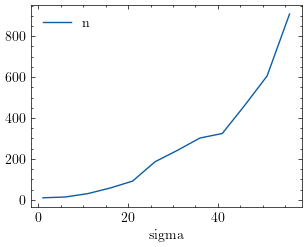

In [ ]:
n_attemps.groupby('sigma').mean().plot()

In [30]:

m = np.array([32, 0, 13])
n = 3  # Dimension of the lattice
sigma = 2  # Error parameter


m_recovered = np.array([0, 0, 0])
attempts = 0

while (m == m_recovered).all() == False:

    attempts += 1

    ggh = GGH(n, sigma)

    # Encryption
    c = ggh.encrypt(m)

    # Decryption
    m_recovered = ggh.decrypt(c)

        

In [31]:
def describe_ggh_instance(ggh_instance):
    """
    Describes all the elements of a given GGH instance.
    
    Args:
    ggh_instance (GGH): An instance of the GGH class.
    
    Returns:
    dict: A dictionary containing all the elements of the GGH instance.
    """
    description = {
        "Good basis (R)": ggh_instance.R,
        "Bad basis (B)": ggh_instance.B,
        "Dimension (n)": ggh_instance.n,
        "Unimodular matrix (U)": ggh_instance.U,
        "Error parameter (sigma)": ggh_instance.sigma,
        "Error vector": ggh_instance.e,
        "Encrypted message": ggh_instance.c,
        "Closest Vector": ggh_instance.v,
    }
    
    return description


In [32]:

ggh_description = describe_ggh_instance(ggh)
for key, value in ggh_description.items():
    print(f"{key}:")
    print(value, "\n")


Good basis (R):
[[-2  3 -7]
 [ 4 -1 -6]
 [ 1  6  2]] 

Bad basis (B):
[[-1465.  -153.    26.]
 [  975.   101.   -17.]
 [-3853.  -402.    68.]] 

Dimension (n):
3 

Unimodular matrix (U):
[[   1.    0.    0.]
 [-623.  -65.   11.]
 [ -58.   -6.    1.]] 

Error parameter (sigma):
2 

Error vector:
[-1 -1  1] 

Encrypted message:
[-96970. -10123.   1717.] 

Closest Vector:
[-96969 -10122   1716] 



In [33]:
from numpy.linalg import inv

v = ggh.v
B = ggh.B

np.dot(v, inv(B)).astype(int)
print('B^(-1) * v = ', np.dot(v, inv(B)).astype(int))

B^(-1) * v =  [32  0 13]
